<a href="https://colab.research.google.com/github/MonaRansing/EDA_Superstore/blob/main/Exploratory_Data_Analysis_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

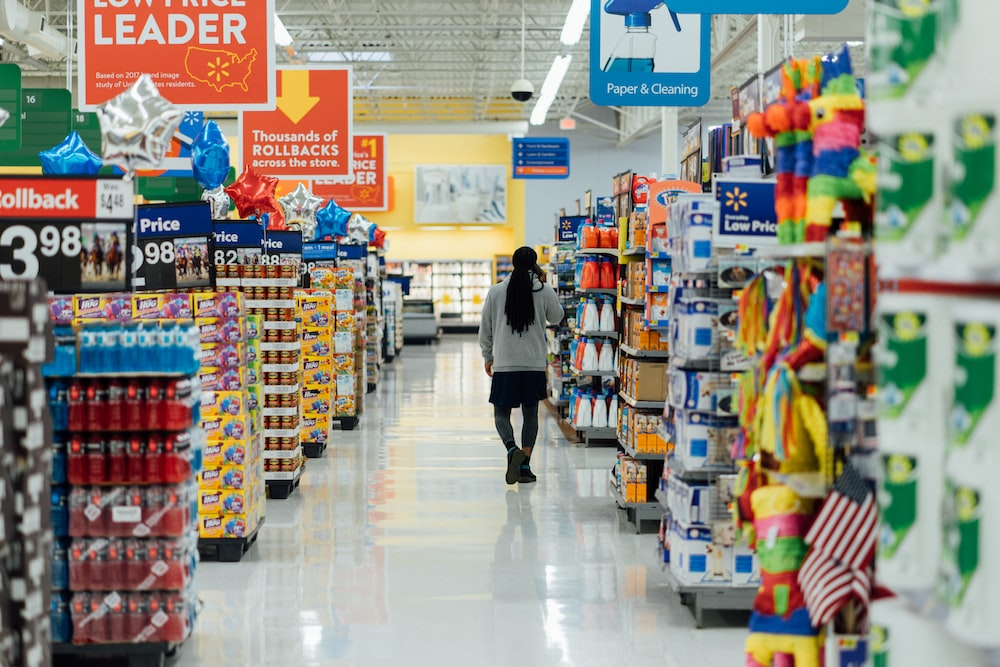

### ***Importing Libraries***

In [25]:
# Importing libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams


### ***Loading Dataset***

In [26]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# CSV file is read here
df = pd.read_csv("/content/drive/MyDrive/Spaeks foundation internship/SampleSuperstore.csv")

### ***Dataset First view***

In [29]:
# print first five rows
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [30]:
# print last five rows
df.tail(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


### ***Dataset rows and columns count***

In [32]:
# Shape of dataset
df.shape

(9994, 13)

### ***Dataset Information***

In [33]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### ***Description of dataset***

In [34]:
# Description of dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [35]:
# Creating copy of dataset
df1 = df.copy()
df1.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### ***Find out Duplicate values***

In [36]:
# Dataset duplicate value count
duplicate_values = df1.duplicated().value_counts()
duplicate_values

False    9977
True       17
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

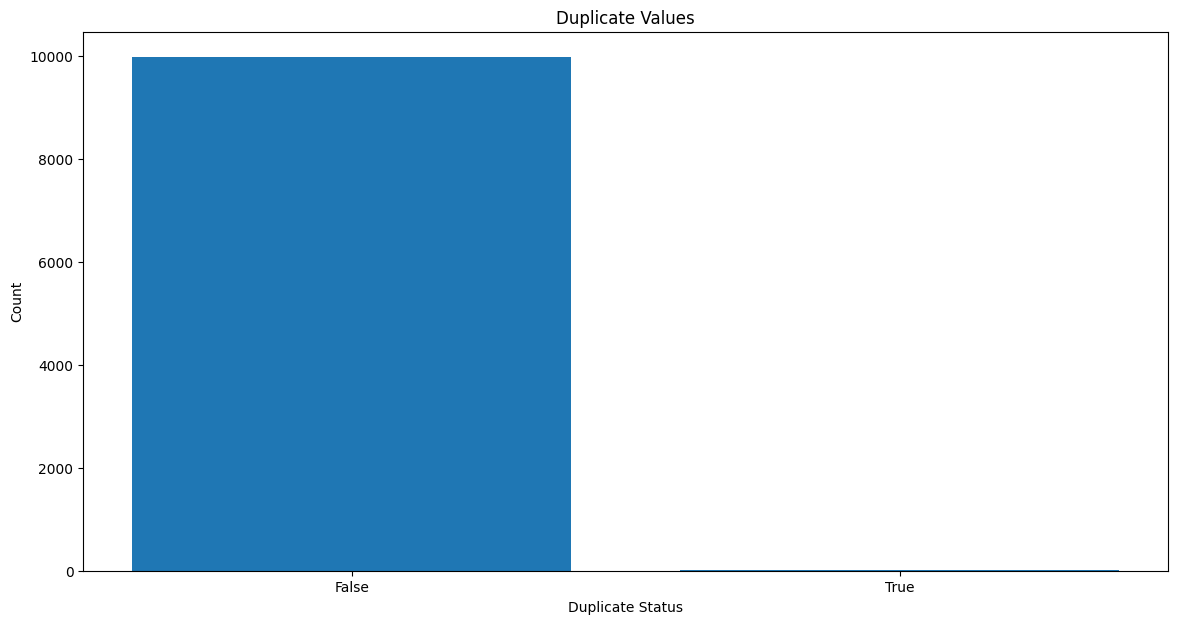

In [37]:
# visualization of duplicate values using countplot
plt.figure(figsize=(14,7))
plt.bar(duplicate_values.index.astype(str), duplicate_values.values)
plt.xlabel("Duplicate Status")
plt.ylabel("Count")
plt.title("Duplicate Values")
plt.show


In [38]:
# Droping duplicate values
df1 = df1.drop_duplicates()
df1

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [39]:
# shape after dropping duplicate values
df1.shape

(9977, 13)

### ***Missing Values***

In [40]:
# missing value count
missing_value = df1.isnull().sum().sort_values(ascending=False)

In [41]:
missing_value

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Information about dataset

The dataset is of a superstore and I have to analyze and discover this dataset to find out weak areas where I can work to make more profit. So the dataset has 9994 rows and 13 columns initially. Then I found out that dataset has 17 duplicate values so after dropping them shape of dataset become 9977 rows and 13 columns. After that, I try to find out missing values but there is no missing values.

### ***Understanding variables***

In [42]:
# Columns from dataset
df1.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [43]:
df.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


### ***Variables Description***

* **Ship Mode** : Type of shipment
* **Segment** : Type of segment (Consumer, corporate, Home office)
* **Country** : Name of the country
* **City** : Name of the cities
* **State** : Name of the states
* **Postal code** : Postal code of the perticular city
* **Region** : Region of city (North, Sounth, East, West)
* **Category** : Category of the product
* **Sub-Category** : Sub category of the product
* **Sales** : Sales of the perticular product in perticular city
* **Quantity** : How many products were sold
* **Discount** : How much discount has given
* **Proft** : Profit on product


### ***Unique Values for each variable***

In [50]:
print(df1.apply(lambda col: col.unique()))

Ship Mode       [Second Class, Standard Class, First Class, Sa...
Segment                        [Consumer, Corporate, Home Office]
Country                                           [United States]
City            [Henderson, Los Angeles, Fort Lauderdale, Conc...
State           [Kentucky, California, Florida, North Carolina...
Postal Code     [42420, 90036, 33311, 90032, 28027, 98103, 761...
Region                               [South, West, Central, East]
Category                 [Furniture, Office Supplies, Technology]
Sub-Category    [Bookcases, Chairs, Labels, Tables, Storage, F...
Sales           [261.96, 731.94, 14.62, 957.5775, 22.368, 48.8...
Quantity          [2, 3, 5, 7, 4, 6, 9, 1, 8, 14, 11, 13, 10, 12]
Discount        [0.0, 0.45, 0.2, 0.8, 0.3, 0.5, 0.7, 0.6, 0.32...
Profit          [41.9136, 219.582, 6.8714, -383.031, 2.5164, 1...
dtype: object


### ***Data Wrangling***

In [60]:
# Dataset has 17 duplicate values. Those values are dropped here.
df1 = df.drop_duplicates()
df1

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### ***Data visualization***

### **Firstly I tried to fount out strong areas.**

### 1) Highly preffered ship mode?

In [70]:
ship_mode_counts = df1['Ship Mode'].value_counts().reset_index().rename(columns={'index':'Ship Mode','Ship Mode':'ship_mode_counts'})
ship_mode_counts

,Ship Mode,ship_mode_counts
0,Standard Class,5955
1,Second Class,1943
2,First Class,1537
3,Same Day,542


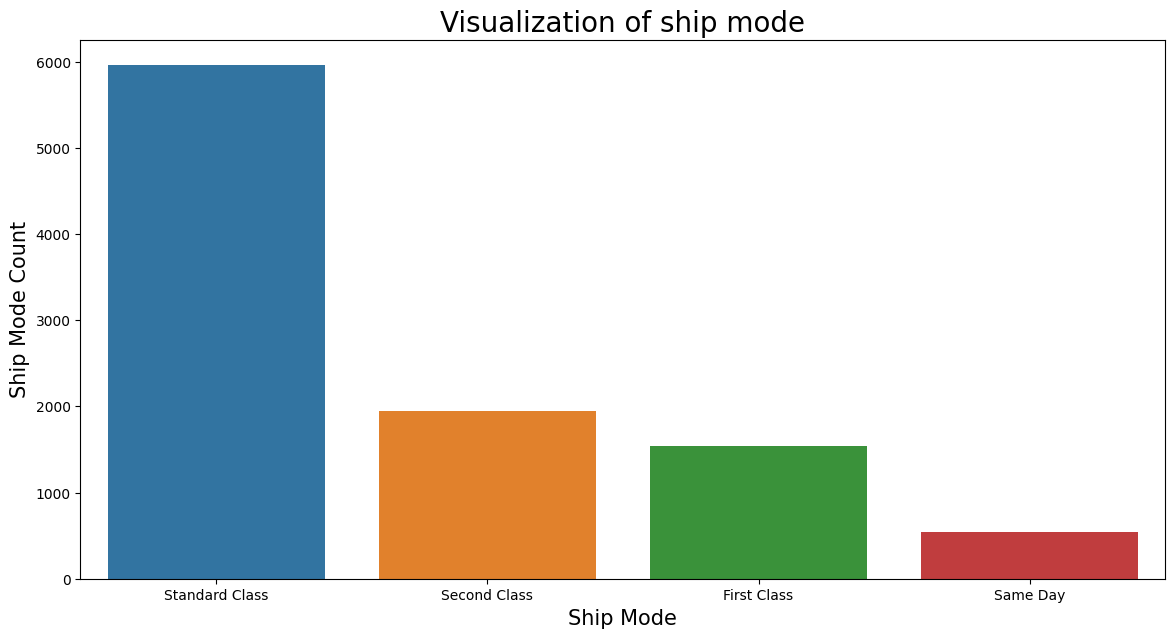

In [74]:
# visualization of ship mode
plt.figure(figsize=(14,7))
sns.barplot(x =ship_mode_counts['Ship Mode'], y=ship_mode_counts['ship_mode_counts'], order=ship_mode_counts['Ship Mode'])
plt.ylabel("Ship Mode Count", fontsize = 15)
plt.xlabel('Ship Mode', fontsize = 15)
plt.title('Visualization of ship mode', fontsize = 20)
plt.show()

*From above barplot, we can see that standard class ship mode is highly preffered and same-day ship mode is less preferred.*

## 2) Most preffered segment type?

In [75]:
preffered_segment_type = df1['Segment'].value_counts()
preffered_segment_type

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

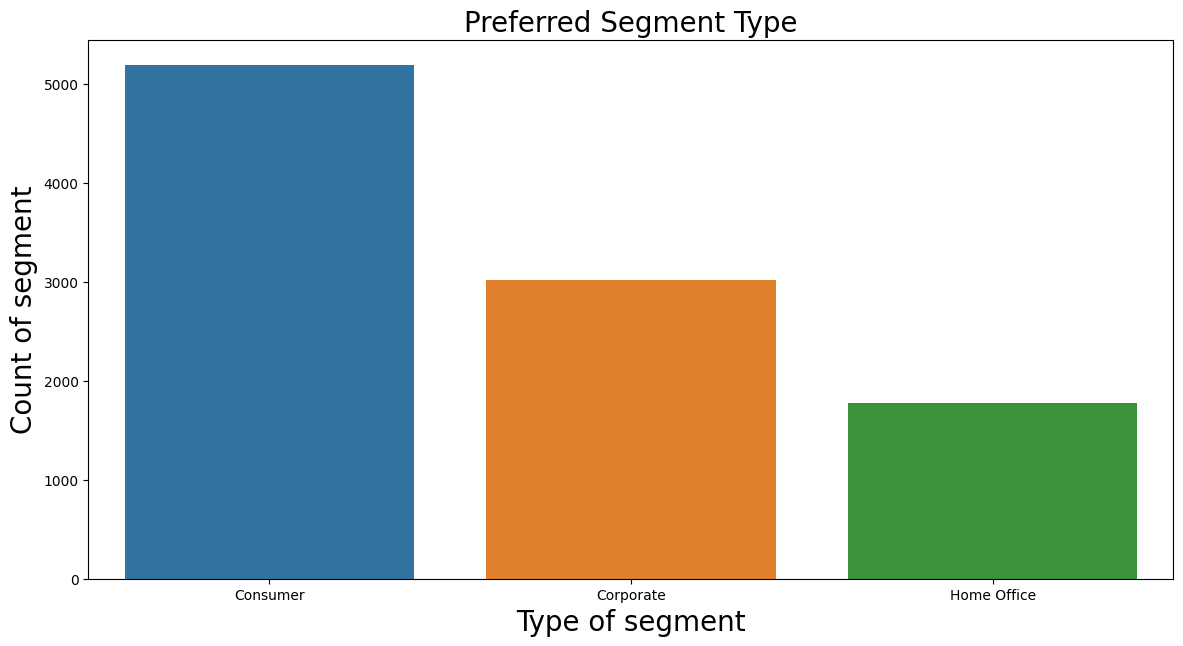

In [77]:
plt.figure(figsize=(14,7))
sns.countplot(x=df1['Segment'],order=preffered_segment_type.index)
plt.title('Preferred Segment Type', fontsize=20)
plt.xlabel('Type of segment', fontsize = 20)
plt.ylabel('Count of segment', fontsize = 20)
plt.show()

From above countplot we can conclude that consumer segment type is highly preferred.